# Сборный проект-1

## Общая информация о данных

Добавим библиотеки `pandas`, `numpy`, `matplotlib.pyplot`, `stats` для дальнейшей работы и откроем исходный датасет.

In [1]:
# Добавим библиотеки и откроем файл с данными
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
#Прочитаем датасет
data = pd.read_csv('C:/Anaconda/Sborniy 1/games.csv')

In [3]:
# Получим общую информацию о датасете и выведем 5 первых строк
data.info()
data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14518,Kokoro no Kokoron,DS,2011.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
13570,Disney Planes Fire & Rescue,Wii,2014.0,Action,0.00,0.04,0.00,0.00,NaN,NaN,NaN
2864,iCarly,DS,2009.0,Adventure,0.66,0.01,0.00,0.05,NaN,8.3,E
12079,Billy's Boot Camp: Wii de Enjoy Diet!,Wii,2011.0,Sports,0.00,0.00,0.07,0.00,NaN,NaN,NaN
8194,NFL 2K2,XB,2002.0,Sports,0.13,0.04,0.00,0.01,87.0,tbd,E


В целом датасет представлен 11 столбцами и 16715 строками.\
Данные представленны только в вещественном и строковом форматах.

Были обнаружены следующие проблемы:
- В данных присутствуют пропуски - столбцы `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`;
- Название всех столбцов не приведено к змеиному регистру;
- Данные с годом издания хранятся в вещественном типе данных;
- Столбец `User_Score` содержит как вещественные, так и строковые данные.

### Вывод по разделу

В ходе общего знакомства с данными была получена информация о датасете. \
Выявленные проблемы - пропуски, названия столбцов не в змеином регистре, перевод в другой тип данных - необходимо устранить.

## Предобработка данных

### Замените названия столбцов (приведите к нижнему регистру)

In [4]:
# Приведем названия столбцов к нижнему регистру
data.set_axis(
    ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',\
    'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],\
    axis = 'columns',\
    inplace = True
)

In [5]:
# Проверим, что названия изменились
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Вывод по подразделу

Названия столбцов приведено к нижнему (змеиному) регистру.

### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

In [6]:
# Выведем типы данных столбцов
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Переведём данные в столбцах `year_of_release`, `critic_score` в целочисленный вид.

In [7]:
# Перевод столбцов в Int64
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')

Столбец `user_score` оценки пользователей, данные хранятся в строковом виде, переведём их в вещественный тип данных.\
Получим уникальные значения.

In [8]:
# Уникальные значения user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
data.user_score

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: object

В уникальных значениях получили оценки пользователей, пропуски и одно значение `'tbd'`.\
Значение `tbd` означает - `To Be Determined`- `Рейтинг будет определен`.\
Скорее все, пользователи не провели достаточное количество игр/сессий для определения рейтинга игр.\
Так же можно заметить, что игры с `user_score = tbd` имеют достаточно маленький тираж продаж, относительно других игр.

Для перевода столбца `user_score` в вещественный тип данных необходимо заменить значение `tbd`.\
Т.к. мы выяснили, что это означает - рейтинг ещё не определён, заменим `tbd` на `NaN`.

In [10]:
#Получим уникальные значения и их количество в user_score
print(data['user_score'].value_counts().sort_values(ascending = False))

#Посчитаем количество пропусков в user_score
print(data['user_score'].isna().sum())

#Произведём замену 'tbd' на 'nan'
data['user_score'] = data['user_score'].replace('tbd', np.nan)

#Убедимся, что значения 'tbd' заменено (повторно посчитаем пропуски)
print(data['user_score'].isna().sum())

#Изменим тип данных в user_score
data['user_score'] = data['user_score'].astype('float')

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1         2
2.3       2
0.2       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64
6701
9125


In [11]:
# Выведем типы данных столбцов
data.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score         float64
rating              object
dtype: object

Тип данных в столбцах `year_of_release`,`critic_score`,`user_score` изменён.

#### Вывод по подразделу 
<a id='tbd'></a>

В результате изменения типа данных были преобразованы столбцы - `year_of_release`,`critic_score`,`user_score`.\
Теперь данные содержатся в корректном типе (int и float) и пригодны для дальнейшей работы.

Для перевода столбца `user_score` в вещественный тип было необходимо произвести замену значения `tbd`. Т.к. мы пришли к выводу, что это игры, которые не набрали достаточное количество игровых сессий для пользовательской оценки, было решено заменить значения на пропуски `nan`. После замены тип данных в `user_score` был успешно изменен на вещественный.


### Обработайте пропуски при необходимости

Пропуски присутствуют в следующий столбцах - `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`.\
Посчитаем количество пропусков при помощи цикла.

In [12]:
#Подсчёт количества пропусков при помощи цикла
col_list = ['name', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
for col_name in col_list:
    print(len(data[pd.isna(data[col_name])]))

2
269
2
8578
9125
6766


В столбцах `name` и `genre` одинаковое количество пропусков - 2. Посмотрим внимательнее эти строки.

In [13]:
#Пропуски в столбце name
data[pd.isna(data['name'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в `name` и `genre` в одних строках. Никак нельзя достоверно установить название и жанр.

Данные в `year_of_release`, `critic_score` и `user_score` находятся в int и float типе данных, замены на 0 производить некорректно, значения-заглушки изменят тип данных на строковые. Оставим данные столбцы без изменений.\
Есть гипотеза, что в `year_of_release` в названиях некоторых игр указан год издания (нпр. 'All-Star Baseball 2005'), в то же время игра могла выйти в конце предыдущего года, либо в начале следующего года. Так же на разных платформах игра могла выходить в разные года.

Пропуски в `rating` достоверно не установить.

В столбцах `name`, `genre`, `rating` можно произвести замену пропусков на "значение-заглушку" `undefined - не определено`.

In [14]:
#Замена в столбцах на заглушку с помощью цикла
fill_list = ['name', 'genre', 'rating']

for fill_name in fill_list:
    data[fill_name] = data[fill_name].fillna('undefined')
    
#Проверка замены 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null Int64
user_score         7590 non-null float64
rating             16715 non-null object
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


После замены в исходном датасете осталось только 3 столбца с пропусками в данных - `year_of_release`, `critic_score` и `user_score`.

Причины, которые могли привести к пропускам:
- Ошибки в сборе и записи данных;
- Непопулярные игры или старые игры - можно объяснить пропуски в оценке от критиков и игроков, рейтинге.

#### Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать

Аббревиатура `tbd` отдельно разбиралась и описывалась в разделе по изменению типов данных, т.к. из-за этого значения нельзя было поменять тип данных в столбце `user_score` на float. Во избежании повторения, прикреплена гиперссылка [Аббревиатура tbd](#tbd). В итоге, значение `tbd` заменили на пропуски `nan`.

#### Вывод по подразделу

В ходе работы по замене пропусков ни в каких данных нельзя произвести адекватную замену. Было принято решение, в столбцах, где данные содержатся в строков типе заменить пропуски на значениия-заглушки `undefined - не определено`.

Где данные представлены в целочисленном и вещественном формате замены пропусков не производились ввиду отсутствия адекватной замены.

Аббревиатура `tbd` в столбце означает - `To Be Determined`- `Рейтинг будет определен`.\
Скорее все, пользователи не провели достаточное количество игр/сессий для определения рейтинга игр.\
Значение `tbd` было заменено на `nan`.

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [15]:
#Посчитаем суммарные продажи во всех регионах
data['sales_total'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [16]:
#Проверим, что столбец с расчётами добавился в таблицу
data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
11458,DaGeDar,DS,2011,Action,0.08,0.00,0.00,0.01,NaN,NaN,E,0.09
5747,KISS Pinball,PS,2001,Action,0.17,0.12,0.00,0.02,26,3.8,T,0.31
13218,BeatMania IIDX 3rd Style,PS2,2000,Simulation,0.00,0.00,0.05,0.00,NaN,NaN,undefined,0.05
13443,Wrath Unleashed,XB,2004,Strategy,0.03,0.01,0.00,0.00,69,7.0,T,0.04
16010,Adventure Time: The Secret of the Nameless,3DS,2014,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,undefined,0.01


#### Вывод по подразделу

Суммарные продажи во всех регионах посчитаны в столбце `sales_total`.

### Вывод по предобработке данных

В ходе предобработки данных:
- Были приведены к нижнему регистру названия столбцов;
- Изменены типы даных для дальнейшей работы;
- Обработаны пропуски (где это возможно) - было принято решение заменять пропуски значениями-заглушками. Достоверно предположить, чем адекватно заменить пропуски не было установлено. В столбцах с целочисленным и вещественным типами данных пропуски не заменялись;
- Значение `tbd` в столбце `user_score` заменено на пропуски `nan`.
- Были посчитаны суммарные продажи во всех регионах в новом столбце `sales_total`.

Данные готовы к исследовательскому анализу данных.

## Исследовательский анализ данных

В ходе исследовательского анализа данных необходимо выполнить следующие задачи:
- Провести анализ, сколько игр выпускалось в различные годы;
- Проанализировать, как менялись продажи по платформам. Среди них выделить платформы с наибольшими суммарными продажами. Выделить "срок жизни" платформы;
- Выделить актуальный период для дальнейшего прогноза;
- Выделить, какие платформы лидируют по продажам, растут или падают. Выбрать несколько потенциально прибыльных платформ;
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам;
- Постройть диаграмму рассеяния и корреляцию между отзывами пользователей и продажами;
- Изучить общее распределение игр по жанрам.

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды? 
<a id='actual'></a>

Для ответа на вопрос, сколько игр выпускалось в разные годы, сгруппируем данные по столбцу с годом выхода (year_of_release), построим столбчатую диаграмму, а так же диаграмму размаха.

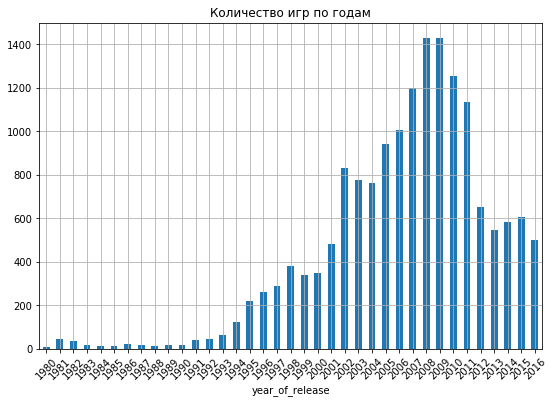

In [17]:
#Группировка данных по году выпуска, построение столбчатой диаграммы
(
    data
    .groupby('year_of_release')['year_of_release']
    .count()
    .plot(
        kind='bar',
        title='Количество игр по годам',
        figsize=(9,6),
        grid=True)
)
plt.xticks(rotation=45)
plt.show()

На графике представлены значения от 1980 до 2016 года.\
В период с 1980 по 1993 включительно - выходило не более 62 игр.\
Затем рост до максимума примерно 1400 игр в год в 2008-2009 году.\
После плавное падение до 500 игр в 2016.

In [18]:
#Получим в цифрах количество игр в год
(
    data
    .groupby('year_of_release')
    .agg({'year_of_release':'count'})
)


,year_of_release
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Исходя из численного представления выделяется скачок выпуска игр в 1994 году. Стало 121, до этого было не более 62 игр.

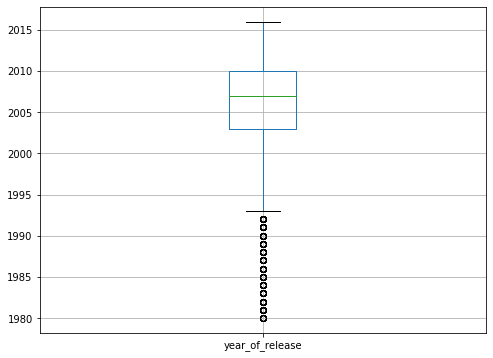

In [19]:
#Построим диаграмму размаха по годам выпуска игр
data.boxplot(column='year_of_release', figsize=(8,6))
plt.show()

На диаграмме размаха видно, что значения ниже 1993 года являются выбросами.\
Выше верхней границы нормальных зачений выбросов нет.

#### Вывод по подразделу

В период с 1980 по 2016 год включительно выпускалось различное количество игр в год.\
С 1980 по 1992 - максимум 46 (в 1981).\
Пик приходится на период с 2006 по 2011 - выпускалось больше 1000 игр в год.

Считаю, что данные за весь период не важны.
Можно оставить выборку с 1993 по 2016 год выпуска.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Изучим, как меняются продажи по платформам.

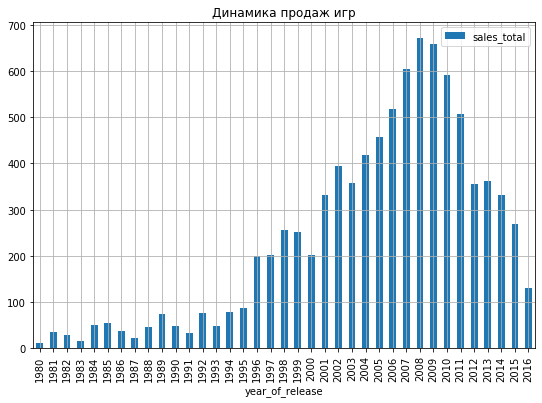

In [20]:
#Продажи по платформам в динамике
(
    data
    .pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
    .plot(
        kind='bar',
        title='Динамика продаж игр',
        grid=True,
        figsize=(9,6)
    )
)
plt.show()

Рост продаж по платформам начинается с 1996 года. Активный рост до 2008 (максимум около 660 млн. проданных копий). Затем - устойчивый тренд к снижению. 

Получим платформы с наибольшими суммарными продажами.

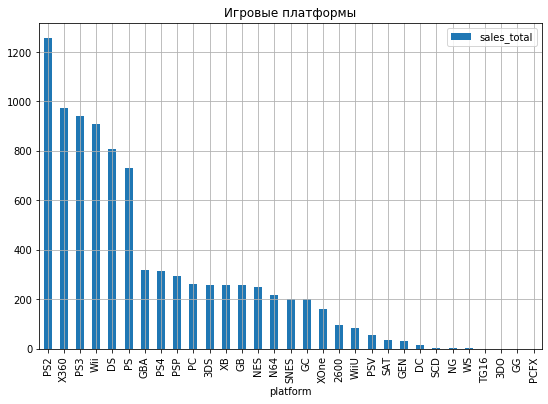

In [21]:
#Самые продаваемые платформы
(
    data
    .pivot_table(index='platform', values='sales_total', aggfunc='sum')
    .sort_values(by='sales_total', ascending=False)
    .plot(
        kind='bar',
        title='Игровые платформы',
        grid=True,
        figsize=(9,6)
    )
)
plt.show()

Чётко выражены топ-6 платформ.\
Максимальные суммарные продажи выделяются:
- PS;
- PS2;
- PS3;
- Wii;
- X360;
- DS.\
Их суммарные продажи варьируются от 700 млн. до более 1200 млн. проданных копий.
    
Был получен `топ-6 платформ по продажам`. Построим по ним столбчатые диаграммы продаж по годам.

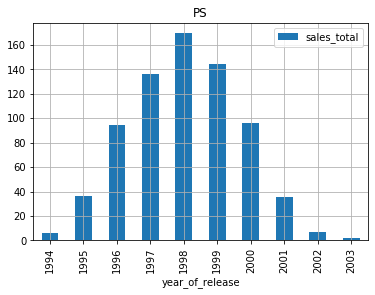

In [22]:
#PS
(
    data
    .query('platform == "PS"')
    .groupby('year_of_release')
    .agg({'sales_total':'sum'})
    .plot(
        kind='bar',
        title='PS',
        grid=True,
        figsize=(6,4))
)
plt.show()

Продажи отмечаются в течение 10 лет. Пик популярности платформы примерно 5 лет.

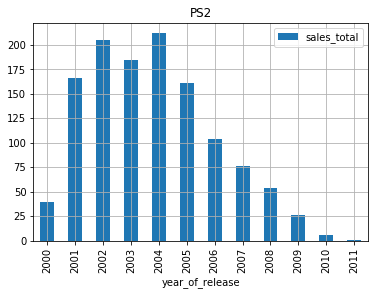

In [23]:
#PS2
(
    data
    .query('platform == "PS2"')
    .groupby('year_of_release')
    .agg({'sales_total':'sum'})
    .plot(
        kind='bar',
        title='PS2',
        grid=True,
        figsize=(6,4))
)
plt.show()

Продажи отмечаются в течение 12 лет. Пик популярности примерно 5 лет (с 2001 по 2005), затем падение спроса.

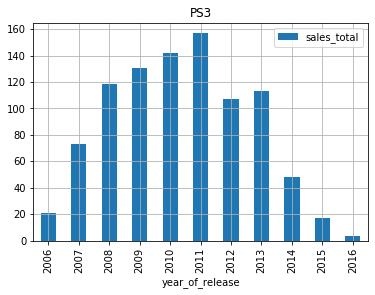

In [24]:
#PS3
(
    data
    .query('platform == "PS3"')
    .groupby('year_of_release')
    .agg({'sales_total':'sum'})
    .plot(
        kind='bar',
        title='PS3',
        grid=True,
        figsize=(6,4))
)
plt.show()

Продажи отмечаются в течение 11 лет. Пик популярности примерно 6 лет (с 2008 по 2013), затем падение спроса.

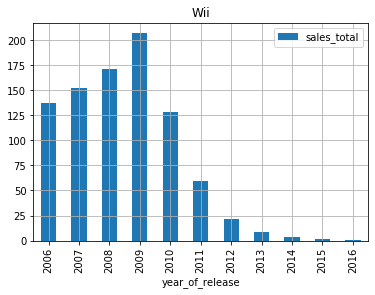

In [25]:
#Wii
(
    data
    .query('platform == "Wii"')
    .groupby('year_of_release')
    .agg({'sales_total':'sum'})
    .plot(
        kind='bar',
        title='Wii',
        grid=True,
        figsize=(6,4))
)
plt.show()

Продажи отмечаются в течение 11 лет. Пик популярности примерно 5 лет (с 2006 по 2010), затем падение спроса.

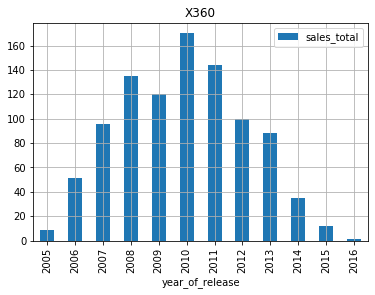

In [26]:
#X360
(
    data
    .query('platform == "X360"')
    .groupby('year_of_release')
    .agg({'sales_total':'sum'})
    .plot(
        kind='bar',
        title='X360',
        grid=True,
        figsize=(6,4))
)
plt.show()

Продажи отмечаются в течение 12 лет.

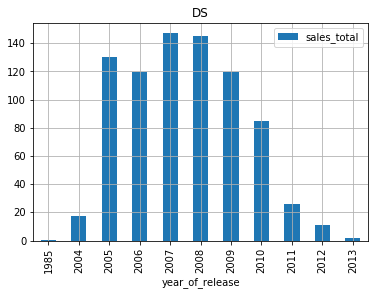

In [27]:
#DS
(
    data
    .query('platform == "DS"')
    .groupby('year_of_release')
    .agg({'sales_total':'sum'})
    .plot(
        kind='bar',
        title='DS',
        grid=True,
        figsize=(6,4))
)

plt.show()

На данных выделяется одна продажа в 1985 году. Будем считать её не существенной и не будем учитывать.\
Рост продаж отмечается примерно в течение первых 5 лет. Затем идёт спад.\
Пик популярности примерно 6 лет (с 2005 по 2010), затем падение спроса.

В среднем срок жизни одной платформы составляет примерно 11 лет. 

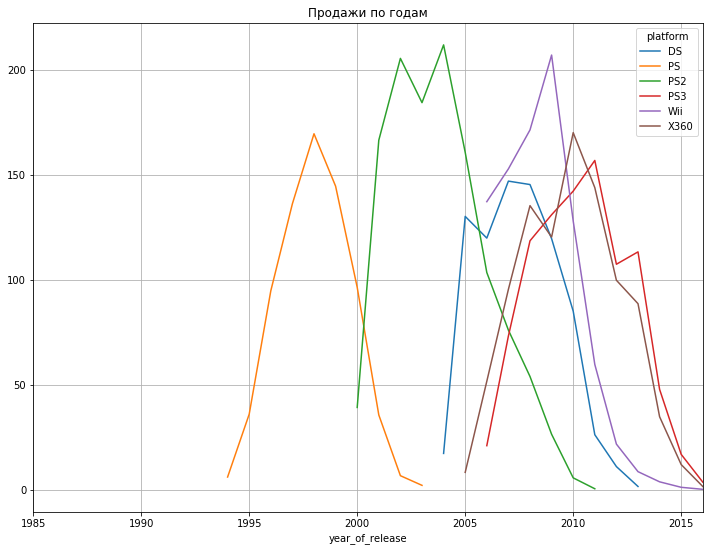

In [28]:
# Линейный график
(
    data
    .query('platform == "DS" | platform == "X360" | platform == "Wii" | platform == "PS3" |\
           platform == "PS2" | platform == "PS"')
    .pivot_table(index=['year_of_release','platform'], values='sales_total', aggfunc='sum')
    .unstack('platform')
    .plot(
        y='sales_total',
        title='Продажи по годам',
        grid=True,
        figsize=(12,9)
    )
)
plt.show()

#### Вывод по подразделу

По итогу анализа датасета была построена столбчатая диаграмма с суммарными продажами по всем платформам.\
С большим отрывом выделяется топ 6 платформ по продажам игр:
- PS;
- PS2;
- PS3;
- Wii;
- X360;
- DS.

В среднем срок жизни одной платформы составляет 11 лет. \
Платформа находится на пике популярности в среднем около 5 лет \
Продажи самой "старой" платформы из топа - PS - стартовали с 1994 года.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Выделим `актуальный период`.

В разделе c расчётом [Количество игр в год](#actual) мы пришли к выводу, что игр до 1993 года выходило мало и эти данные можно отбросить.

В анализе самых популярных платформ мы сформировали топ 6. Самая старая платформа из данного топа `PS` стартовала в продажах с 1994 года.

Срок жизни одной платформы составляет примерно 11 лет. Первые 5 лет идет рост продаж, затем - постепенное угасание.

В среднем пик популярности платформы - 5 лет.

Т.к. на основе актуального периода нужно будет построить прогноз на 2017 год, возьмём `актуальный период равный 5 годам`.


#### Вывод по подразделу

На основе вышеуказанных сведений было установлено, что для прогноза на 2017 год актуальный период равен `5 лет (с 2012 по 2016 год).`

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ. Не учитывайте в работе данные за предыдущие годы.

Получим новый срез данных, с учётом выделенного актуального периода и построим линейный график продаж.

In [29]:
#Выделим актуальный период в data
data = data.query('year_of_release >= 2012')

In [30]:
#Получим таблицу с динамикой
(
    data
    .pivot_table(index=['year_of_release','platform'], values='sales_total', aggfunc='sum')
    .sort_values(by='year_of_release', ascending = True)
    )


sales_total
year_of_release platform             
2012            3DS             51.36
                DS              11.01
                PC              23.22
                PS3            107.36
                PSP              7.69
                PSV             16.19
                Wii             21.71
                WiiU            17.56
                X360            99.74
2013            XOne            18.96
                X360            88.58
                WiiU            21.65
                Wii              8.59
                PSV             10.59
                PS3            113.25
                PS4             25.99
                PC              12.38
                DS               1.54
                3DS             56.57
                PSP              3.14
2014            Wii              3.75
                XOne            54.07
                X360            34.74
                WiiU            22.03
                PSV             11.90
                PSP              0.24
                PS4            100.00
                PS3             47.76
                PC              13.28
                3DS             43.76
2015            XOne            60.14
                X360            11.96
                Wii              1.14
                PSV              6.25
                WiiU            16.35
                PS4            118.90
                PS3             16.82
                PC               8.52
                3DS             27.78
                PSP              0.12
2016            X360             1.52
                3DS             15.14
                PC               5.25
                PS3              3.60
                PS4             69.25
                PSV              4.25
                Wii              0.18
                WiiU             4.60
                XOne            26.15

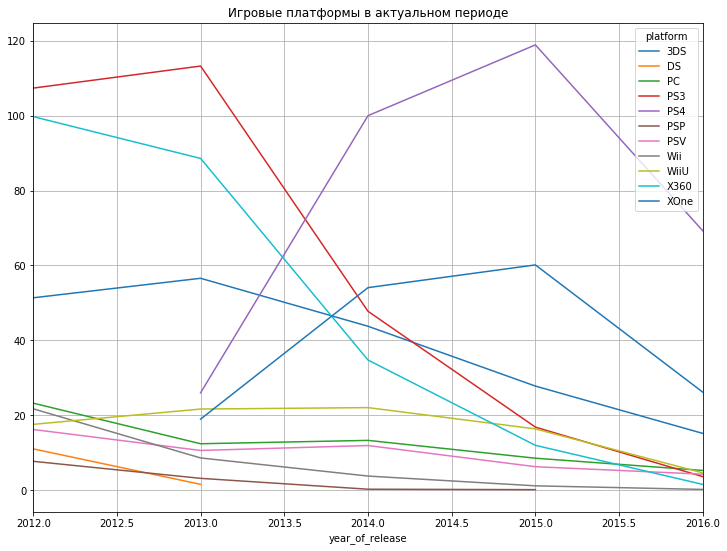

In [31]:
#Построим линейный график по платформам
(
    data
    .pivot_table(index=['platform', 'year_of_release'], values='sales_total', aggfunc='sum')
    .unstack('platform')
    .plot(
        y='sales_total',
        title='Игровые платформы в актуальном периоде',
        grid=True,
        figsize=(12,9)
    )
)
plt.show()

В актуальном периоде по суммарным продажам лидируют:
- PS4 - 314.14 млн. копий;
- PS3 - 288.79 млн. копий;
- X360 - 236.54 млн. копий;
- 3DS - 194.61 млн. копий;
- XOne - 159.32 млн. копий.

Данный топ платформ хорошо выделяется, т.к. разница между последним из топа XOne (159.32) и первой "нетоповой" платформой WiiU (82.19) составляет в 2 раза.\
PS3 и 3DS - популярные в своё время, но уже устаревшие платформы. Продажи игр на данные консоли стремится к 0.

На конец актуального периода у всех платформ отмечается спад.

Самые популярные платформы на конец актуального периода являются потенциально прибыльными:

1) PS4 - 69.25 млн. копий;\
2) XOne - 26.15 млн. копий;\
3) 3DS - 15.14 млн. копий.

#### Вывод по подразделу

Проанализировав данные за актуальный период были получены следующие выводы:
- самая продаваемая платформа - PS4 (314.14 млн. копий);
- к концу актуального периода на всех платформах наблюдается спад продаж;
- **потенциально прибыльными платформами являются:**\
1) PS4 - 69.25 млн. копий;\
2) XOne - 26.15 млн. копий;\
3) 3DS - 15.14 млн. копий.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Возьмём топ-3 потенциально прибыльных платформ (PS4, XOne, 3DS) и построим диаграммы разамаха по глобальным продажам игр.

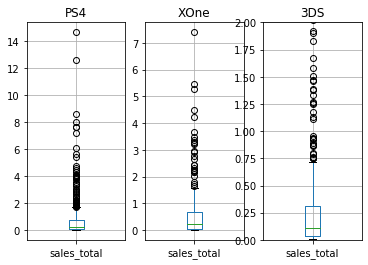

In [32]:
#диаграммы размаха
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey='col')
(
    data
    .query('platform == "PS4"')
    .boxplot(
        column ='sales_total',
        figsize=(8,6),
        ax=ax1
    )
)
plt.ylim(0,4)
ax1.set_title('PS4')

(
    data
    .query('platform == "XOne"')
    .boxplot(
        column ='sales_total',
        figsize=(8,6),
        ax=ax2
    )
)

plt.ylim(0,4)
ax2.set_title('XOne')

(
    data
    .query('platform == "3DS"')
    .boxplot(
        column ='sales_total',
        figsize=(8,6),
        ax=ax3
    )
)
plt.ylim(0,2)
ax3.set_title('3DS')
plt.show()

**Опишем диаграмму размаха PS4:**\
Нормальные значения (верхний и нижний ус) - от 0 до 1.75\
Медиана - примерно 0.2\
Межквартильные размах - примерно от 0.1 до 0.75\
Выбросы расположены выше 1.75

**Опишем диаграмму размаха XOne:**\
Нормальные значения (верхний и нижний ус) - от 0 до 1.6\
Медиана - примерно 0.2\
Межквартильные размах - примерно от 0.1 до 0.7\
Выбросы расположены выше 1.6

**Опишем диаграмму размаха 3DS:**\
Нормальные значения (верхний и нижний ус) - от 0 до 0.74\
Медиана - примерно 0.1\
Межквартильные размах - примерно от 0.05 до 0.3\
Выбросы расположены выше 0.74

#### Вывод по подразделу

Были построены три диаграммы размаха по самым популярным платформам в актуальном периоде: PS4, XOne, 3DS.\
Характерной особенностью является присутствие выбросов на всех трёх диаграммах выше верхней границы нормальных значений.\
В контексте исследования, выбросы - это самые популярные игры (хиты), с максимальными продажами в несколько млн копий.\
Исходя из значений медианы - большинство игр продаётся в диапазоне 0.1-0.2 млн копий.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

#### Влияние отзывов критиков на продажи

В качестве одной популярной платформы возьмём PS4.

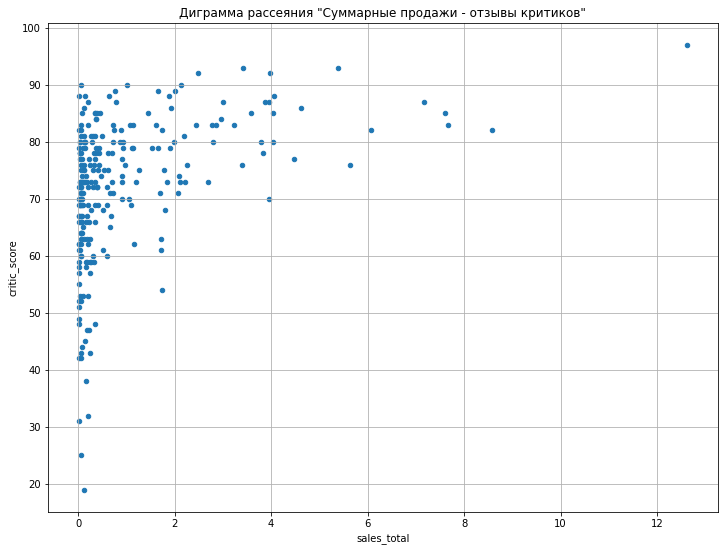

In [33]:
#Получим срез с платформой PS4
data_ps4 = data.query('platform == "PS4"')

#Построим диаграмму рассеяния между суммарными продажами и отзывами критиков
data_ps4.plot(
    kind='scatter',
    title='Диграмма рассеяния "Суммарные продажи - отзывы критиков"',
    x='sales_total',
    y='critic_score',
    grid=True,
    figsize=(12,9)
)
plt.show()

In [34]:
#Посчитаем корреляцию между отзывами критиков и суммарными продажами
data_ps4[['critic_score', 'sales_total']].corr()

,critic_score,sales_total
critic_score,1.000000,0.406568
sales_total,0.406568,1.000000


На графике выделяется достаточно большое число значений около нуля по оси суммарных продаж.\
Данные игры могут иметь как низкий, так и высокий рейтинг. Зависимость не прослеживается.\
В то же время, по мере роста суммарных продаж прослеживается рост оценки критиков.\

Для корреляции примем следующие интервалы:
- выше 0.5 - сильная связь;
- от 0.3 до 0.5 - средняя связь;
- от 0 до 0.3 - слабая связь.

Это подверждается расчётом корреляции.\
`Значение равно 0.41`, что говорит о средней корреляции.

#### Влияние отзывов пользователей на продажи

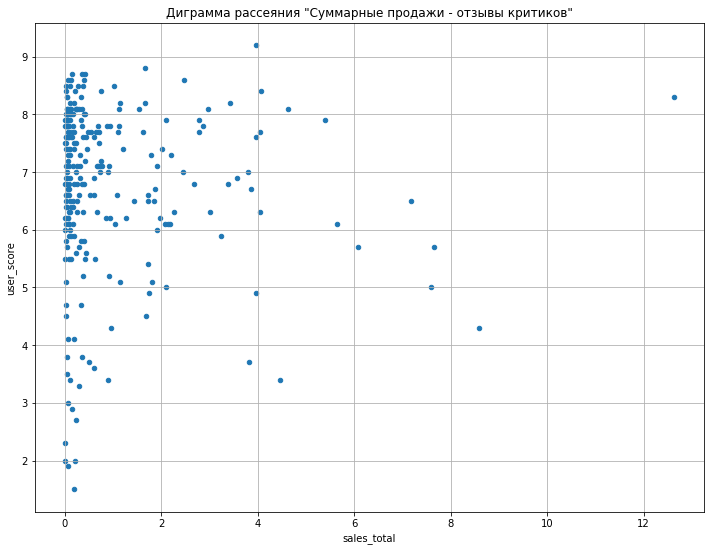

In [35]:
#Построим диаграмму рассеяния между суммарными продажами и отзывами пользователей
data_ps4.plot(
    kind='scatter',
    title='Диграмма рассеяния "Суммарные продажи - отзывы критиков"',
    x='sales_total',
    y='user_score',
    grid=True,
    figsize=(12,9)
)
plt.show()

In [36]:
#Посчитаем корреляцию между отзывами пользователей и суммарными продажами
data_ps4[['user_score', 'sales_total']].corr()

,user_score,sales_total
user_score,1.000000,-0.031957
sales_total,-0.031957,1.000000


Картина на графике зависимости между пользовательскими оценками и суммарными продажами хаотична.\
Нельзя выделить никакой зависимости.\
Так же это подтверждаётся рассчётом коэфицента корреляции.\
`Значение равно -0.03`, что говорит о практически полном отсутствии взаимосвязи между пользовательски оценками и продажами.

#### Вывод по подразделу

Для исследования зависимостей между оценками (критиков и пользователей) и продажами была выбрана самая популярная платформа в актуальном периоде PS4.

В ходе анализа была обнаружена средняя положительная корреляция между оценками критиков и продажами `(0.41)`.\
Корреляция между пользовательскими оценками и продажами равна `(-0.03)`, что говорит о практически полном
отсутствии взаимосвязи.

### Соотнесите выводы с продажами игр на других платформах.

Полученные выводы о средней зависимости оценок критиков на продажи и отсутствии зависимости оценок пользователей на продажи посчитаем коэфициент корреляции для платформ 3DS, XOne.

In [37]:
#Получим срез с платформой 3DS
data_3ds = data.query('platform == "3DS"')

#Посчитаем корреляцию для платформы 3DS
data_3ds[['critic_score', 'user_score', 'sales_total']].corr()

,critic_score,user_score,sales_total
critic_score,1.000000,0.722762,0.320803
user_score,0.722762,1.000000,0.197583
sales_total,0.320803,0.197583,1.000000


Для платформы 3DS при подсчёте коррелции получили:
- среднюю связь (0.32) между оценками критиков и продажами;
- слабую связь (0.20) между оценками пользователей и продажами.

In [38]:
#Получим срез с платформой XOne
data_xone = data.query('platform == "XOne"')

#Посчитаем корреляцию для платформы XOne
data_xone[['critic_score', 'user_score', 'sales_total']].corr()

,critic_score,user_score,sales_total
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
sales_total,0.416998,-0.068925,1.000000


Для платформы XOne при подсчёте коррелции получили:
- среднюю связь (0.42) между оценками критиков и продажами;
- слабую связь (-0.07) между оценками пользователей и продажами.

#### Вывод по подразделу

В ходе анализа корреляции по платформам 3DS и XOne в целом были получены идентичные выводы, как и для платформы PS4.\
Существует `средняя связь (от 0.3 до 0.4`) между оценками критиков и продажами.\
`Слабая связь, либо полное отсутствие (от -0.07 до 0.20)` между оценками пользователей и продажами.

Картина по коэфициенту корреляции платформы XOne очень похожа на PS4 - значения практически одинаковые.

В целом, можно сделать вывод, что есть зависимость между оценками критиков и количеством продаж видеоигр.\
Зависимость продаж от оценок пользователей прослеживается слабо.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Построим распределение игр по жанрам с помощью столбчатой диаграммы.

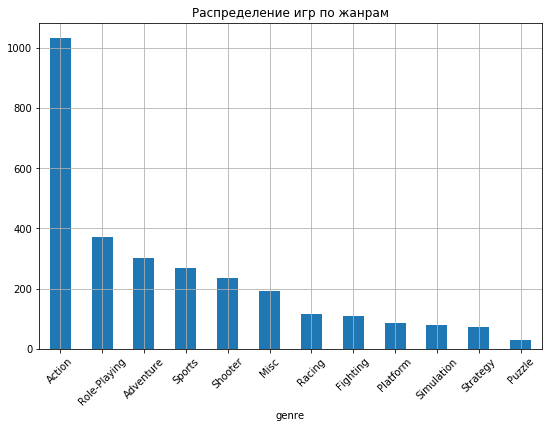

In [39]:
#Общее распределение игр по жанрам
(
    data
    .groupby('genre')['genre']
    .count()
    .sort_values(ascending=False)
    .plot(
        kind='bar',
        title='Распределение игр по жанрам',
        figsize=(9,6),
        grid=True)
)
plt.xticks(rotation=45)
plt.show()

С большим отрывом самый популярный жанр - action (боевик) - более 1000 игр;\
Затем идут role-playing (ролевые игры) - около 380 игр;\
И на третьем месте самых популярных - adventure (приключения) - около 300 игр.

Меньше всего игр в жанрах puzzle (пазлы), стратегии и симуляторы (меньше 100 в каждом).

Построим диаграмму по медианным продажам по жанрам игр.

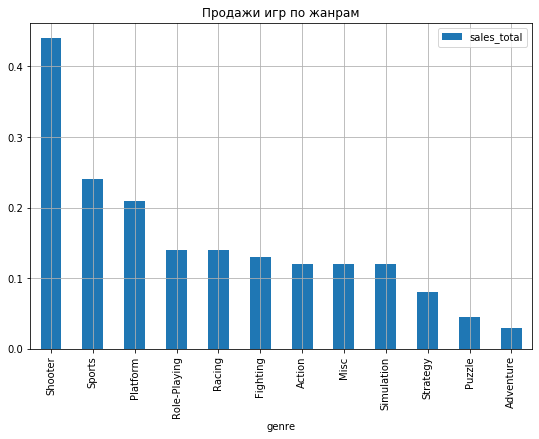

In [40]:
#Продажи игр по жанрам по медиане
(
    data
    .pivot_table(index='genre', values='sales_total', aggfunc='median')
    .sort_values(by='sales_total', ascending=False)
    .plot(
        kind='bar',
        title='Продажи игр по жанрам',
        grid=True,
        figsize=(9,6)
    )
)
plt.show()

Самые продаваемые жанры (по медиане):
- Шутеры (примерно 0.45 млн);
- Спортивные симуляторы (примерно 0.24 млн);
- Платформенные игры (примерно 0.21 млн).

Наименее продаваемые (по медиане):
- Стратегии (примерно 0.08 млн);
- Пазлы (примерно 0.04 млн);
- Приключения (примерно 0.03 млн).

#### Вывод по подразделу

В общем распределении игр по жанрам с большим отрывом лидирует `боевики (более 1000 игр)`.\
Самым продаваемым жанром (с заметным отрывом) по медиане является `шутер (0.45 млн копий)`.\
Так же в топ-3 входят `спортивные симуляторы (примерно 0.24 млн)` и `платформенные игры (примерно 0.21 млн)`.

Хуже всего продаются `стратегии (примерно 0.08 млн)`, `пазлы (примерно 0.04 млн)`, `приключения (примерно 0.03 млн)`.\
Видимо, эти жанры больше не популярны у пользователей и постепенно сходят на нет.

### Общий вывод по исследовательскому анализу данных

В ходе исследовательского анализа данных были получены основные выводы:
- Компьютерные игры начали выпускаться с 1980 года;
- Пик по количеству игр в год составляет в районе 1400 в 2008-2009 году;
- Максимальные суммарные продажи совпадают с пиком по выпуску игр (2008-2009) и составляют около 660 млн копий;
- `Самые популярные платформы:`\
1) PS;\
2) PS2;\
3) PS3;\
4) Wii;\
5) X360;\
6) DS.
- `Был определен актуальный период`, необходимый для построения прогноза на следующий год. Он составляет 5 лет (с 2012 по 2016 год);
- На текущий момент `потенциально прибыльными платформами` являются:\
1) PS4;\
2) XOne;\
3) 3DS
- Было установлено о наличии зависимости между продажами и оценками от критиков;
- Выявлены `наиболее распространённые игры` - это боевики, ролевые игры и приключения.
- `Наименее распространнённые игры` - это пазлы, стратегии и симуляторы.
- `Самые продаваемые жанры (по медиане)`:\
1) Шутеры (примерно 0.45 млн);\
2) Спортивные симуляторы (примерно 0.24 млн);\
3) Платформенные игры (примерно 0.21 млн).

- `Наименее продаваемые (по медиане)`:\
1) Стратегии (примерно 0.08 млн);\
2) Пазлы (примерно 0.04 млн);\
3) Приключения (примерно 0.03 млн).

## Составьте портрет пользователя каждого региона

Для составление портрета пользователя для регионов Северная Америка, Европа, Япония необходимо:
- выделить топ-5 самых популярных платформ;
- выделить топ-5 самых популярных жанров;
- определить, влияет ли рейтинг ESRB на продажи в отдельном регионе.

### Определите для пользователя каждого региона (NA, EU, JP):

#### Северная Америка

**Топ-5 самых популярных платформ для Северной Америки.**

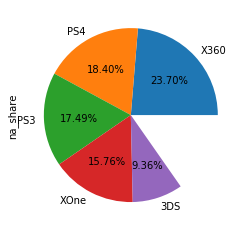

In [41]:
#Посчитаем доли от продаж в регионе и добавим в таблицу
data['na_share'] = data['na_sales'] / data['na_sales'].sum()

#NA топ-5 платформ
(
    data
    .pivot_table(index='platform', values='na_share', aggfunc='sum')
    .sort_values(by='na_share', ascending=False)
    .head(5)
    .plot(kind='pie', y='na_share', grid=True, autopct='%1.2f%%', legend=False)
)
plt.show()

Самая популярная платформа - X360 (доля 23.7 %).\
Продажи PS4 (18.4%), PS3 (17.5%), XOne (15.8%) различаются не очень сильно. Платформа 3DS - самая маленькая по продажам из топ 5.\
Суммарно 5 самых популярных платформ составляют около 80% всех платформ.

**Топ-5 жанров для Северной Америки**

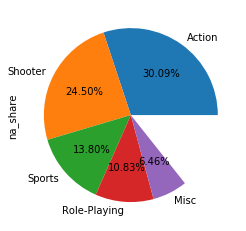

In [42]:
#NA топ-5 жанров
(
    data
    .pivot_table(index='genre', values='na_share', aggfunc='sum')
    .sort_values(by='na_share', ascending=False)
    .head(5)
    .plot(kind='pie', y='na_share', grid=True, autopct='%1.2f%%', legend=False)
)
plt.show()

Из 5 самых популярных жанров выделяется боевики (30%) и шутеры (24.5%). Суммарно они составляют более 50%  по популярности от всех жанров.\
Так же в топ 5 входят спортивные симуляторы, ролевые игры и жанр misc.

**Рейтинг ESRB для Северной Америки**

Из открытых источников возьмём классификацию рейтинга.

AO (Adults only 18+) — только для взрослых\
E - everyone - для всех\
M (Mature 17+) — от 17 лет\
T (Teen) — для подростков 13-19 лет\
K-A (Kids to Adults)— для детей и взрослых\
E10+ (Everyone 10+) — для всех старше 10 лет\
EC (Early Childhood) — для детей младшего возраста\
RP (Rating pending) — рейтинг ожидается

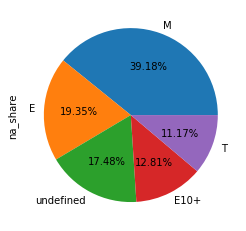

In [43]:
#NA ESRB
(
    data
    .pivot_table(index='rating', values='na_share', aggfunc='sum')
    .sort_values(by='na_share', ascending=False)
    .plot(kind='pie', y='na_share', grid=True, autopct='%1.2f%%', legend=False)
)
plt.show()

На диаграмме представлены 4 значений рейтинга и рейтинг не определён (undefined).

Рейтинг ESRB влияет на продажи - самые продаваемыми с рейтингом M (от 17 лет) (39.2%), т.е. для взрослых.\
Наименее продаваемые - игры с рейтингом T - для подростков (11.2%).

#### Европа

**Топ-5 самых популярных платформ для Европы.**

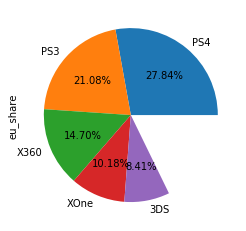

In [44]:
#Посчитаем доли от продаж в регионе и добавим в таблицу
data['eu_share'] = data['eu_sales'] / data['eu_sales'].sum()

#EU топ-5 платформ
(
    data
    .pivot_table(index='platform', values='eu_share', aggfunc='sum')
    .sort_values(by='eu_share', ascending=False)
    .head(5)
    .plot(kind='pie', y='eu_share', grid=True, autopct='%1.2f%%', legend=False)
)
plt.show()

Самая популярная платформа - PS4 (28%).\
На втором месте - PS3 (21%). Суммарно две консоли одного семейства охватывают 49% от всех игр - половина рынка.\
Далее, в порядке убывания идут X360 (14.7%), XOne (10.2%), 3DS (8.5%).\
Суммарно топ-5 охватывает более 85% рынка платформ в регионе.

**Топ-5 жанров для Европы**

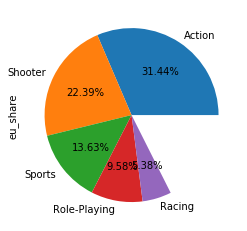

In [45]:
#EU топ-5 жанров
(
    data
    .pivot_table(index='genre', values='eu_share', aggfunc='sum')
    .sort_values(by='eu_share', ascending=False)
    .head(5)
    .plot(kind='pie', y='eu_share', grid=True, autopct='%1.2f%%', legend=False)
)
plt.show()

Среди жанров самыми популярнымыми являются боевики (31.5%)\
Затем идут шутеры (22.4%)\
Так же в топ-5 входят спортивные симуляторы (13.6%), ролевые игры (9.6%), гонки (5.4%).

Суммарно топ-5 охватывает более 80% рынка жанров.

**Рейтинг ESRB для Европы**

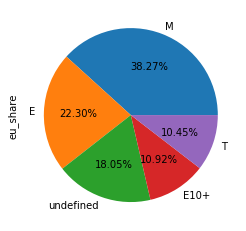

In [46]:
#EU ESRB
(
    data
    .pivot_table(index='rating', values='eu_share', aggfunc='sum')
    .sort_values(by='eu_share', ascending=False)
    .plot(kind='pie', y='eu_share', grid=True, autopct='%1.2f%%', legend=False)
)
plt.show()

На диаграмме представлены 4 значений рейтинга и рейтинг не определён (undefined).

Рейтинг ESRB влияет на продажи - самые продаваемыми с рейтингом M (от 17 лет) (38.3%), т.е. для взрослых.\
Наименее продаваемые - игры с рейтингом T - для подростков (10.5%).

#### Япония

**Топ-5 самых популярных платформ для Японии.**

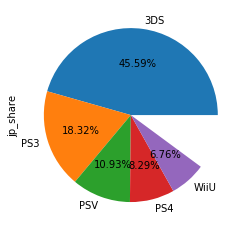

In [47]:
#Посчитаем доли от продаж в регионе и добавим в таблицу
data['jp_share'] = data['jp_sales'] / data['jp_sales'].sum()

#JP топ-5 платформ
(
    data
    .pivot_table(index='platform', values='jp_share', aggfunc='sum')
    .sort_values(by='jp_share', ascending=False)
    .head(5)
    .plot(kind='pie', y='jp_share', grid=True, autopct='%1.2f%%', legend=False)
)
plt.show()

Самая популярная платформа в Японии - 3DS (Nintendo) - её доля составляет 45.6% от всего рынка.\
По убыванию популярности следом идут PS3 (18.3%), PSV (11%), PS4 (8.3%), WiiU (6.8%).

Выделяется доминирование платформы 3DS.

**Топ-5 жанров для Японии**

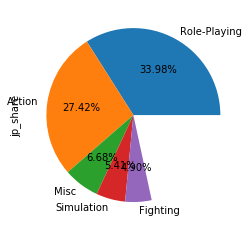

In [48]:
#JP топ-5 жанров
(
    data
    .pivot_table(index='genre', values='jp_share', aggfunc='sum')
    .sort_values(by='jp_share', ascending=False)
    .head(5)
    .plot(kind='pie', y='jp_share', grid=True, autopct='%1.2f%%', legend=False)
)
plt.show()

Топ-5 жанров возглавляют ролевые игры (34%).\
Так же большая доля у боевиков (27.5%).\
Суммарно эти два жанра охватывают больше половины всего рынка (61.5%).

Так же в топ-5 жанров представлены misc (6.7%), симуляторы (5.4%), файтинги (5%).

Доля топ-5 жанров от всего рынка составляет 79%.

**Рейтинг ESRB для Японии**

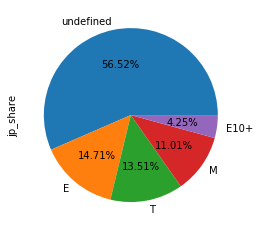

In [49]:
#JP ESRB
(
    data
    .pivot_table(index='rating', values='jp_share', aggfunc='sum')
    .sort_values(by='jp_share', ascending=False)
    .plot(kind='pie', y='jp_share', grid=True, autopct='%1.2f%%', legend=False)
)
plt.show()

Более половины рынка составляют игры с отсутствующим (undefind) рейтингом (56.5%).\
В целом нельзя выделить какой-то рейтинг, который продавался бы лучше всех, разница в долях небольшая.\
Хуже всех продаются игры с рейтингом E10+ (для всех старше 10 лет).

#### Вывод по подразделу

По полученным данным можно составить средний портрет пользователя:
- `Северная Америка.` Популярны платформы X360, PS4, PS3, XOne. Самые популярные жанры боевики и шутеры. Лучше всего продаются игры с рейтингом M (для взрослых).

- `Европа.` Популярны платформы серии PS (3 и 4). Самые популярные жанры боевики и шутеры. Лучше всего продаются игры с рейтингом M (для взрослых).

- `Япония.` Популярна платформа 3DS. Самые популярные жанры ролевые игры и боевики. Рейтинг практически не влияет на продажи. Хуже всего продаются игры с рейтигом E10+ (для всех старше 10 лет).

В целом, портрет пользователя из Северной Америки и Европы очень похож. Возможно, это сказывается близость культур. Портрет для пользователя из Японии сильно отличается - популярны другие платформы и жанры игр.

## Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Алгоритм проверки гипотезы начнём с формирования нулевой гипотезы Н0 и альтернативной гипотезы Н1.
Н0 всегда формируется так, что бы использовать знак равенства.

`Нулевая гипотеза Н0` - средняя пользовательские рейтинги платформ Xbox One и PC равны;\
`Альтернативная гипотеза Н1` - средняя пользовательские рейтинги платформ Xbox One и PC не равны.

Перед проверкой гипотез визуализируем распределения выборок с помощью гистрограммы.

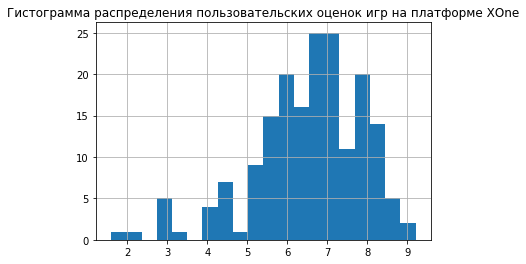

In [50]:
#Получим срез по XOne и построим распределение
data.query('platform == "XOne"')['user_score'].hist(bins=20)
plt.title('Гистограмма распределения пользовательских оценок игр на платформе XOne')
plt.show()

Распределение похоже на нормальное, со скошенностью влево.

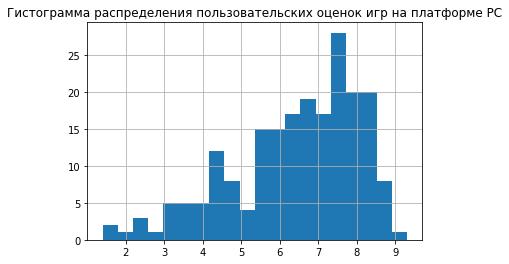

In [51]:
#Получим срез по PC и построим распределение
data.query('platform == "PC"')['user_score'].hist(bins=20)
plt.title('Гистограмма распределения пользовательских оценок игр на платформе PC')
plt.show()

Распределение похоже на нормальное, со скошенностью влево.

Для проверки гипотезы о равенстве среднего двух совокупностей применим метод `scipy.stats.ttest_ind()`.\
Уровень значимости (alpha) зададим = 5%.\
Выборки не схожи по параметрам, скорее всего дисперсии различны, зададим параметр `equal_var = False`.

In [52]:
#Дисперсии выборок не равны, зададим параметр equal_var = False
alpha = .05

results = st.ttest_ind(
    data.query('platform == "XOne"')['user_score'], 
    data.query('platform == "PC"')['user_score'],
    equal_var = False,
    nan_policy='omit'
)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5489537965134426
Не получилось отвергнуть нулевую гипотезу


#### Вывод по подразделу

Не получилось отвергнуть H0. `P-value = 0.55`.\
В результате есть основания пологать, основная гипотеза верна - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

`Нулевая гипотеза Н0` - средняя пользовательские рейтинги жанров Action и Sports равны;\
`Альтернативная гипотеза Н1` - средняя пользовательские рейтинги жанров Action и Sports не равны.

Перед проверкой гипотез визуализируем распределения выборок с помощью гистрограммы.

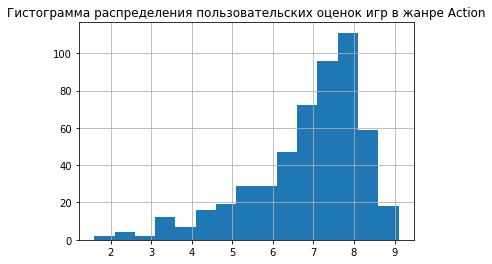

In [53]:
#Получим срез по Action и построим распределение
data.query('genre == "Action"')['user_score'].hist(bins=15)
plt.title('Гистограмма распределения пользовательских оценок игр в жанре Action')
plt.show()

Пик значений в районе 8. Распределение напоминает на нормальное со скошенностью влево.

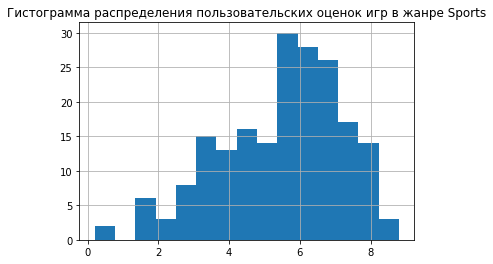

In [54]:
#Получим срез по Sports и построим распределение
data.query('genre == "Sports"')['user_score'].hist(bins=15)
plt.title('Гистограмма распределения пользовательских оценок игр в жанре Sports')
plt.show()

Выделяется пик в районе 6. Распределение не похоже на нормальное.

Уровень значимости (alpha) зададим = 5%.\
Выборки не схожи по параметрам, скорее всего дисперсии различны, зададим параметр `equal_var = False`.

In [55]:
#Дисперсии выборок не равны, зададим параметр equal_var = False
alpha = .05

results = st.ttest_ind(
    data.query('genre == "Action"')['user_score'], 
    data.query('genre == "Sports"')['user_score'],
    equal_var = False,
    nan_policy='omit'
)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.2430777657264175e-20
Отвергаем нулевую гипотезу


#### Вывод по подразделу

Отвергаем Н0. `P-value = <5%`.\
В результате есть основания пологать, основная гипотеза верна - cредние пользовательские рейтинги жанров Action и Sports разные.

### Общий вывод по разделу

В результате проведения t-теста были изучены две гипотезы.

1) Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые подтвердилась.\
2) Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные так же подтвердилась.

В каждой из гипотез имеется 2 генеральные (независимые) совокупностей. Поэтому, для проверки гипотез о равенстве среднего двух совокупностей в исследовании применяли метод `scipy.stats.ttest_ind()`.

## Общий вывод

В результате исследования был проведен анализ данных о компьютерных играх по 2016 год. 

Была выполнена предобработка данных, получены значения, необходимые для анализа данных.

В ходе исследователького анализа данных было выявлено несколько важных закономерностей:
1) Выявлен актуальный период для анализа и прогноза - с 2012 по 2016 год;\
2) Потенциально прибыльные платформы в будущем - PS4, XOne, 3DS;\
3) Установлено, что на продажи игр влияет оценки критиков и практически не влияют оценки пользователей;\
4) Самыми продаваевыми играми по жанрам являются боевики (около 430 млн копий), шутеры (около 300 млн копий), ролевые игры (около 200 млн копий).\
5) Определены портреты пользователей для разных регионов. В целом портрет пользователей из Северной Америки и Европы похож друг на друга, но сильно отличается от пользователя в Японии. Это говорит о том, в зависимости от региона нужно учитывать его особенности (самая популярная площадка, жанр игры, рейтинг ESRB).

С помощью статистических методов были проверены 2 гипотезы:
1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;\
2) Средние пользовательские рейтинги жанров Action и Sports разные.\
Есть все основания утрвеждать, что обе гипотезы верны.

**Основная цель исследования - выявить определяющие успешность игры закономерности.**

Факторы, влияющие на успешность игры:
- платформа, на которую она выпускается;
- жанр игры;
- оценки профессиональных критиков.

Это универсальные факторы, которые необходимо учитывать в любом регионе. В то же время, в анализе данных была установлена региональная специфика. Например, рейтинг ESRB практически не влияет на продажи только в Японии.

Так же, в разных регионах нужно делать ставку на разных платформах и жанрах игр.

В Японии потенциально успешными будут игры в жанрах ролевые игры и боевики на платформе 3DS.

В Северной Америке и в Европе пользоваться успехом будут игры в жанрах боевики и шутеры на платформах XBox (разных поколений) и PS (разных поколений), с рейтингом ESRB для взрослых.